2022년 10월 25일

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
N, D_in, H, D_out = 2, 100, 50, 1

* N은 데이터의 개수이다.
* D_in은 데이터를 돌릴 때 몇개 돌릴 것 인가 이다.
* H은 뇌세포 단계들을 50개 만들것이다 이다.
* D_out은 

In [26]:
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

print(x.shape)
print(y.shape)

(2, 100)
(2, 1)


* x는 내가 만들어낸 x값이다.
* y는 정답지들이다.
* x들을 이용해서 y안에 있는 값이 나오게 학습을 하는 것이다.

In [27]:
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

print(w1.shape)
print(w2.shape)

(100, 50)
(50, 1)


* w1과 w2는 가중치(뉴런)이다. 그래서 뇌세포를 100개 50개를 만들었다.
* 그리고 1개로 줄어들도록 w2를 만들었다.

In [28]:
y_pred_list = list()
loss_list = list()
learning_rate = 1e-6
for t in range(500):
  h = x.dot(w1)
  h_relu = np.maximum(h, 0)
  y_pred = h_relu.dot(w2)
  y_pred_list.append(y_pred[0][0])

  loss = np.square(y_pred - y).sum()
  loss_list.append(loss)
  print(t, loss)

  grad_y_pred = 2.0 * (y_pred - y)
  grad_w2 = h_relu.T.dot(grad_y_pred)
  grad_h_relu = grad_y_pred.dot(w2.T)
  grad_h = grad_h_relu.copy()
  grad_h[h < 0] = 0
  grad_w1 = x.T.dot(grad_h)

  w1 -= learning_rate * grad_w1
  w2 -= learning_rate * grad_w2

0 2083.4690702388816
1 2052.407778338558
2 2021.8233801398442
3 1991.708157951811
4 1962.054530285226
5 1932.855049130781
6 1904.1023973003457
7 1875.7893858296552
8 1847.9089514407256
9 1820.4541540624332
10 1793.4181744077298
11 1766.7943116059612
12 1740.5759808888677
13 1714.7567113288253
14 1689.3301436280453
15 1664.2900279572345
16 1639.6302218426715
17 1615.3446881002114
18 1591.4274928151735
19 1567.872803366848
20 1544.6748864965534
21 1521.82810641802
22 1499.3269229691502
23 1477.1658898040525
24 1455.339652624284
25 1433.842947448448
26 1412.6705989190227
27 1391.8175186456367
28 1371.2787035838003
29 1351.0492344482361
30 1331.1242741599683
31 1311.499066326319
32 1292.1689337530318
33 1273.129276987707
34 1254.3755728938174
35 1235.9033732545365
36 1217.7083034056643
37 1199.786060896997
38 1182.132414181359
39 1164.7432013307416
40 1147.614328778832
41 1130.7417700893607
42 1114.1215647495637
43 1097.7498169882963
44 1081.6226946181337
45 1065.7364279008805
46 1050.0873

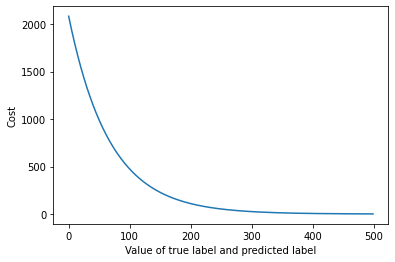

In [31]:
step_list = [i for i in range(len(loss_list))]
plt.plot(step_list, loss_list)
plt.ylabel('Cost')
plt.xlabel('Value of true label and predicted label')
plt.show()